# Sentiment Analysis - Google Play Reviews

### Import Library

In [1]:
# Import Library

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)

import datetime as dt

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Scraping

#### Scraping Data & Save file

In [2]:
!pip install google-play-scraper

# Set parameters getScrapviewSaved
IdScrap = "com.taxsee.taxsee"
IdName = "maxim_reviews"
count = 15000
Path = "dataset/"

%run -i scripts/runMethScraping.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00
✅ Data save in : dataset/maxim_reviews.csv


### Loading Dataset

In [3]:
# Set up dataframe

# Read saved files
app_reviews_df = pd.read_csv(Path + IdName + ".csv")

# View DataFrame information
print(app_reviews_df.shape)

# Preview the first 10 lines of DataFrame
app_reviews_df.head(10)

(90000, 11)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,72a0a89c-4c4a-4ce4-b611-40700530e213,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya tau ini bukan salah maxim nya, tapi tolon...",1,11,3.16.7,2025-04-02 11:53:02,NaN,NaN,3.16.7
1,f51c9b5b-74a3-48ce-8b34-f8877318287a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"ada 2 masalah : Pertama, akun 1 sama akun yg l...",1,12,3.16.7,2025-04-01 06:23:02,Kami sangat menyesal mendengar tentang pengala...,2024-08-20 14:02:41,3.16.7
2,78c7e615-fced-4f2f-9d5c-9b18a992a91d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Maxim bagus harga murah terjangkau , Tp sayang...",5,709,3.16.6,2025-02-22 08:58:43,NaN,NaN,3.16.6
3,e63b4b57-6956-4d5f-b937-5fee8637296d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi belum siap pakai, topup saldo masukny...",1,104,3.16.6,2025-02-07 04:54:00,NaN,NaN,3.16.6
4,9d1be862-6f8e-4f8f-ad3e-79dfd1530019,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"1. Susah banget untuk cancel, padahal udah nun...",1,15,3.16.6,2025-03-31 12:57:01,NaN,NaN,3.16.6
5,8cdb4d0c-d344-4b31-8f1d-9e63e7ed3fa4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa sudah top up ke maxim wallet kaspro sal...,2,24,3.16.6,2025-03-19 23:17:29,NaN,NaN,3.16.6
6,71163fb4-4578-4869-8c26-e8105f7e7406,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hati hati maxim nyedot saldo di kaspro. Saldo ...,1,27,3.16.6,2025-03-12 03:37:44,NaN,NaN,3.16.6
7,6f5c70d2-d836-4174-a5bc-058e176dda75,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi nya sangat cari untung,sengaja dibuat...",1,25,3.16.6,2025-03-18 08:44:55,NaN,NaN,3.16.6
8,7b488d77-2a55-46a6-9a90-25c9d52cc6f8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sejauh ini Maxim yg paling murah dibanding yg ...,3,12,3.16.6,2025-03-18 09:54:05,NaN,NaN,3.16.6
9,b9388904-3a36-45a0-bffe-0776e58e6e1b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ni gimana si pembayaran non tunai nya tadinya ...,3,0,3.16.7,2025-04-01 21:11:53,NaN,NaN,3.16.7


In [4]:
# Dataframe information app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              90000 non-null  object
 1   userName              90000 non-null  object
 2   userImage             90000 non-null  object
 3   content               89999 non-null  object
 4   score                 90000 non-null  int64 
 5   thumbsUpCount         90000 non-null  int64 
 6   reviewCreatedVersion  78041 non-null  object
 7   at                    90000 non-null  object
 8   replyContent          45522 non-null  object
 9   repliedAt             45522 non-null  object
 10  appVersion            78041 non-null  object
dtypes: int64(2), object(9)
memory usage: 7.6+ MB


### Data cleaning

In [5]:
# Create a new DataFrame (clean_df)
clean_df = app_reviews_df.copy()

In [6]:
# Dataframe info
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              90000 non-null  object
 1   userName              90000 non-null  object
 2   userImage             90000 non-null  object
 3   content               89999 non-null  object
 4   score                 90000 non-null  int64 
 5   thumbsUpCount         90000 non-null  int64 
 6   reviewCreatedVersion  78041 non-null  object
 7   at                    90000 non-null  object
 8   replyContent          45522 non-null  object
 9   repliedAt             45522 non-null  object
 10  appVersion            78041 non-null  object
dtypes: int64(2), object(9)
memory usage: 7.6+ MB


In [7]:
# Dataframe null info
clean_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,1
score,0
thumbsUpCount,0
reviewCreatedVersion,11959
at,0
replyContent,44478
repliedAt,44478


In [8]:
# Delete rows that have missing values (NaN) from DataFrame clean_df
clean_df = clean_df.dropna()
clean_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0


In [9]:
# Remove duplicate rows from DataFrame clean_df
clean_df = clean_df.drop_duplicates()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39480 entries, 1 to 89997
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              39480 non-null  object
 1   userName              39480 non-null  object
 2   userImage             39480 non-null  object
 3   content               39480 non-null  object
 4   score                 39480 non-null  int64 
 5   thumbsUpCount         39480 non-null  int64 
 6   reviewCreatedVersion  39480 non-null  object
 7   at                    39480 non-null  object
 8   replyContent          39480 non-null  object
 9   repliedAt             39480 non-null  object
 10  appVersion            39480 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.6+ MB


### Preprocessing

#### Import Module

In [10]:
# Import Module

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


#### Method Preprocessing

In [11]:
# Method Preprocessing
%run -i scripts/runMethPreprocessing.py

# run script slangwords.py
%run -i scripts/slangwords.py

#### Run Methods Preprocessing

In [12]:
# Run Methods Preprocessing

# Clean up the text and save it in the 'text_clean' column
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Turn the letters in text into lowercase and save them in 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Replacing slang words with standard words and keeping them in 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Breaking the text into tokens (words) and storing them in 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Remove stop words (common words) and save them in 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Combining the tokens into a sentence and storing them in 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [13]:
# Dataframe null info
clean_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0


In [14]:
# Dataframe null
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39480 entries, 1 to 89997
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              39480 non-null  object
 1   userName              39480 non-null  object
 2   userImage             39480 non-null  object
 3   content               39480 non-null  object
 4   score                 39480 non-null  int64 
 5   thumbsUpCount         39480 non-null  int64 
 6   reviewCreatedVersion  39480 non-null  object
 7   at                    39480 non-null  object
 8   replyContent          39480 non-null  object
 9   repliedAt             39480 non-null  object
 10  appVersion            39480 non-null  object
 11  text_clean            39480 non-null  object
 12  text_casefoldingText  39480 non-null  object
 13  text_slangwords       39480 non-null  object
 14  text_tokenizingText   39480 non-null  object
 15  text_stopword         39480 non-null  obj

### Labeling

In [15]:
# Import Module

import csv
import requests
from io import StringIO

# Read positive word dictionary data from GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Send an HTTP request to get a CSV file from GitHub
if response.status_code == 200:
    # If the request is successful
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Read the response text as a CSV file using a CSV reader with a comma separator

    for row in reader:
        # Repeat each line in a CSV file
        lexicon_positive[row[0]] = int(row[1])
        # Adding positive words and their scores to the dictionary lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Reading negative word dictionary data from GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Send an HTTP request to get a CSV file from GitHub

if response.status_code == 200:
    # If the request is successful
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Read response text as a CSV file using a CSV reader with comma separators

    for row in reader:
        # Repeat each line in a CSV file
        lexicon_negative[row[0]] = int(row[1])
        # Adding negative words and their scores in the lexicon_negative dictionary
else:
    print("Failed to fetch negative lexicon data")


# Function to determine the sentiment polarity of a tweet
def sentiment_analysis_lexicon_indonesia(text,threshold=0):
    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= threshold):
        polarity = 'positive'
    elif (score < -threshold):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity


# Run the labeling method with the new threshold
results = clean_df['text_stopword'].apply(lambda text: sentiment_analysis_lexicon_indonesia(text))
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

# Displays polarity distribution
print(clean_df['polarity'].value_counts())

polarity
positive    28731
negative    10749
Name: count, dtype: int64


In [16]:
# Print out the results
clean_df[['content', 'text_tokenizingText', 'text_stopword', 'text_akhir', 'polarity_score', 'polarity']].head(5)

,content,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
1,"ada 2 masalah : Pertama, akun 1 sama akun yg l...","[ada, masalah, pertama, akun, sama, akun, yang...","[akun, akun, harga, berbeda, akun, kenakan, ma...",akun akun harga berbeda akun kenakan mahal aku...,-11,negative
36,tidak ada standart kendaraan yg layak.. motor ...,"[tidak, ada, standart, kendaraan, yang, layak,...","[standart, kendaraan, layak, motor, bebek, tua...",standart kendaraan layak motor bebek tua dafta...,-11,negative
42,kenapa si driver nya selalu lama? nungguin 10-...,"[kenapa, si, driver, nya, selalu, lama, nunggu...","[si, driver, nungguin, menit, jarak, jemput, d...",si driver nungguin menit jarak jemput driverny...,-4,negative
45,kak.maxim adalah app yg luar biasa..tapi ada k...,"[kakmaxim, adalah, app, yang, luar, biasatapi,...","[kakmaxim, app, biasatapi, kekurnganya, mencar...",kakmaxim app biasatapi kekurnganya mencari dru...,1,positive
55,sangat bagus sekali dan harga bajat nya pun mu...,"[sangat, bagus, sekali, dan, harga, bajat, nya...","[bagus, harga, bajat, murah, sebelah, sarankan...",bagus harga bajat murah sebelah sarankan memak...,-7,negative


### Data Visualization

#### Plot Score distribution & Sentiment Polarity

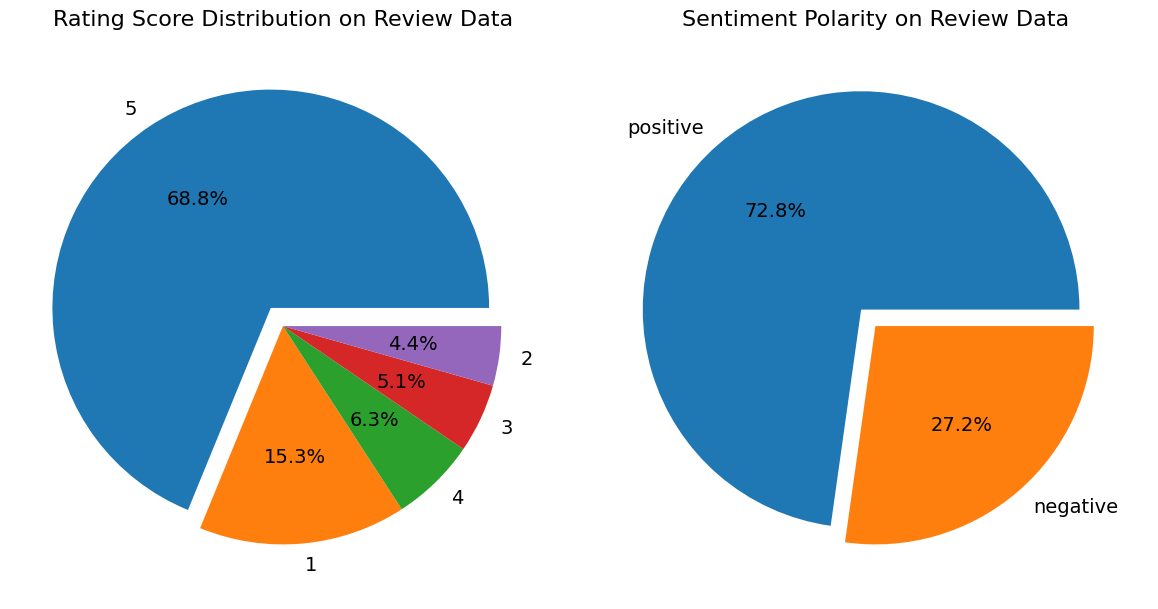

In [17]:
# Plot Score distribution & Sentiment Polarity

import matplotlib.pyplot as plt
import seaborn as sns

# Create an image object with 2 subplots horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 baris, 2 kolom

# First chart pie: Score distribution
sizes1 = clean_df['score'].value_counts().values
labels1 = clean_df['score'].value_counts().index.astype(str)
explode1 = [0.1] + [0] * (len(labels1) - 1)
axes[0].pie(x=sizes1, labels=labels1, autopct='%1.1f%%', explode=explode1, textprops={'fontsize': 14})
axes[0].set_title('Rating Score Distribution on Review Data', fontsize=16, pad=20)

# Second pie chart: Polarity of sentiment
sizes2 = clean_df['polarity'].value_counts().values
labels2 = clean_df['polarity'].value_counts().index.astype(str)
explode2 = [0.1] + [0] * (len(labels2) - 1)
axes[1].pie(x=sizes2, labels=labels2, autopct='%1.1f%%', explode=explode2, textprops={'fontsize': 14})
axes[1].set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Adjust the layout so that it doesn't overlap
plt.tight_layout()

# Display pie chart
plt.show()

#### Plot Word Cloud

In [18]:
# Import Module
import matplotlib.pyplot as plt
import seaborn as sns

!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter

In [19]:
# setup Positive reviews ------------------
# Set the Pandas display options so that columns can display text up to 3000 characters.
pd.set_option('display.max_colwidth', 3000)

# Created a new DataFrame 'positive_tweets' that contains only tweets with positive polarity.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Select only certain columns from the DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Sorting DataFrames 'positive_tweets' based on 'polarity_score' in descending order.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Resetting the DataFrame index to start at 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Added 1 to all DataFrame indexes.
positive_tweets.index += 1


# setup Negative reviews ------------------
# Set the Pandas display options so that columns can display text up to 3000 characters.
pd.set_option('display.max_colwidth', 3000)

# Created a new DataFrame 'negative_tweets' that contains only tweets with negative polarity.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Select only certain columns from the DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Sorting DataFrame 'negative_tweets' based on 'polarity_score' ascending.
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Select the first 10 rows of the sequenced DataFrame.
negative_tweets = negative_tweets[0:10]

# Resetting the DataFrame index to start at 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Added 1 to all DataFrame indexes.
negative_tweets.index += 1


# setup Neutral reviews ------------------
# Set the Pandas display options so that columns can display text up to 3000 characters.
pd.set_option('display.max_colwidth', 3000)

# Created a new DataFrame 'neutral_tweets' that contains only tweets with neutral polarity.
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Selects only certain columns from the DataFrame 'neutral_tweets'.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Sorting DataFrame 'neutral_tweets' by 'polarity_score' (can be ascending or descending, depending on need).
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)  # Bisa juga False

# Choose the amount of data you want to display, such as the first 10 data.
neutral_tweets = neutral_tweets[:10]  # Bisa disesuaikan

# Resetting the DataFrame index to start at 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Added 1 to all DataFrame indexes.
neutral_tweets.index += 1

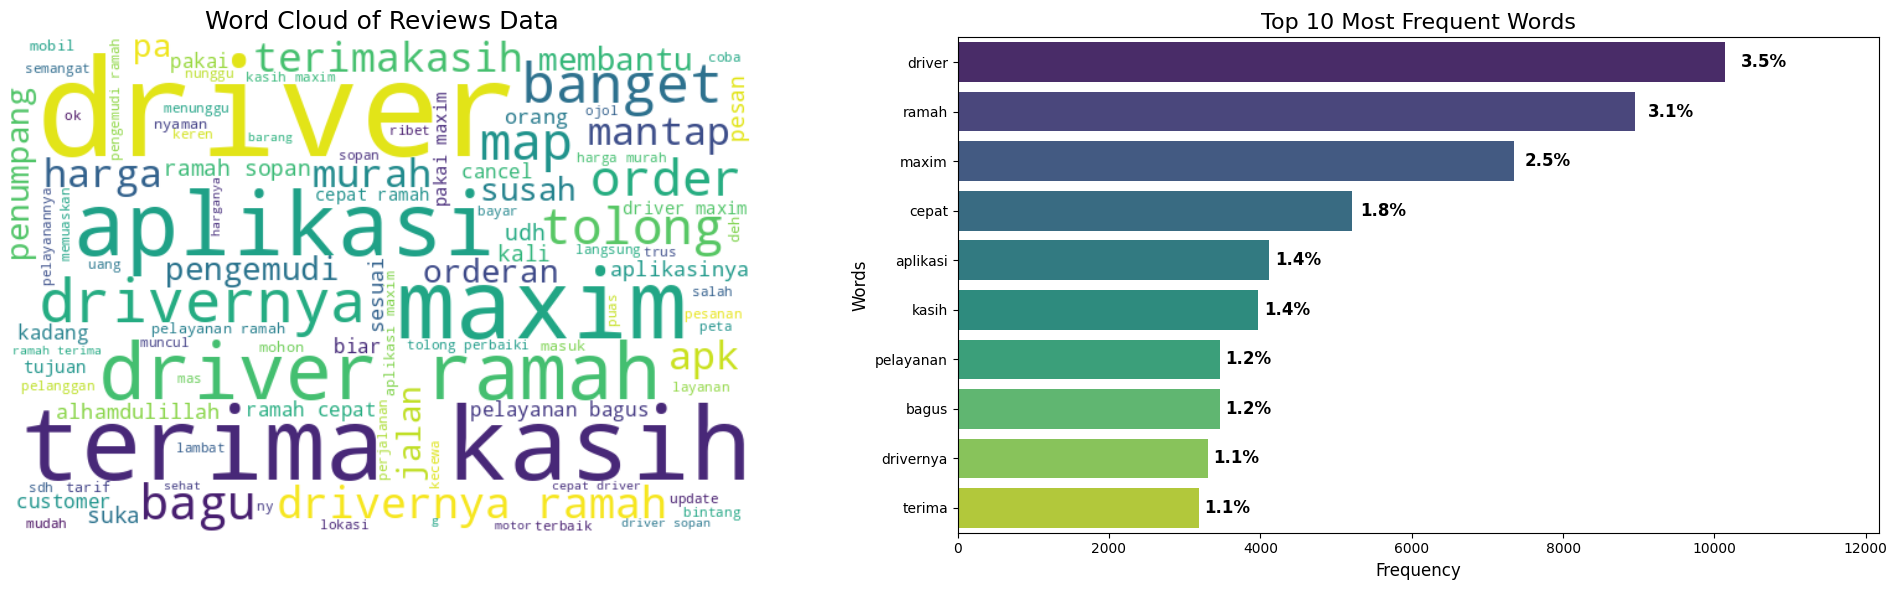

In [20]:
# Plotting Word Cloud of Reviews Data

# Collects all the words from the cleaned text in a single string.
list_words = ' '.join(word for tweet in clean_df['text_stopword'] for word in tweet)

# Create a WordCloud object.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Calculate the frequency of words.
word_counts = Counter(list_words.split())

# Take the 10 most popular words.
top_words = word_counts.most_common(10)

# Separate words and their frequency.
words, counts = zip(*top_words)

# Calculates the percentage of word occurrences.
total_words = sum(word_counts.values())
percentages = [(count / total_words) * 100 for count in counts]

# Create a figure with two subplots (WordCloud and Bar Chart).
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Word Cloud ---
axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].set_title('Word Cloud of Reviews Data', fontsize=18)
axes[0].axis('off')

# --- Bar Chart ---
sns.barplot(x=list(counts), y=list(words), ax=axes[1], palette='viridis')

# Add text at the end of the bar with an offset to move away from the Y-axis.
for i, (count, perc) in enumerate(zip(counts, percentages)):
    offset_x = count * 0.02  # Menambahkan offset 2% dari panjang batang
    axes[1].text(count + offset_x, i, f"{perc:.1f}%", va='center', fontsize=12, color='black', weight='bold')

# Customize the appearance of the chart bar.
axes[1].set_title('Top 10 Most Frequent Words', fontsize=16)
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('Words', fontsize=12)
axes[1].set_xlim(0, max(counts) * 1.2)  # Menambah margin di sumbu X.

#Adjust the layout to make it neat.
plt.tight_layout()
plt.show()


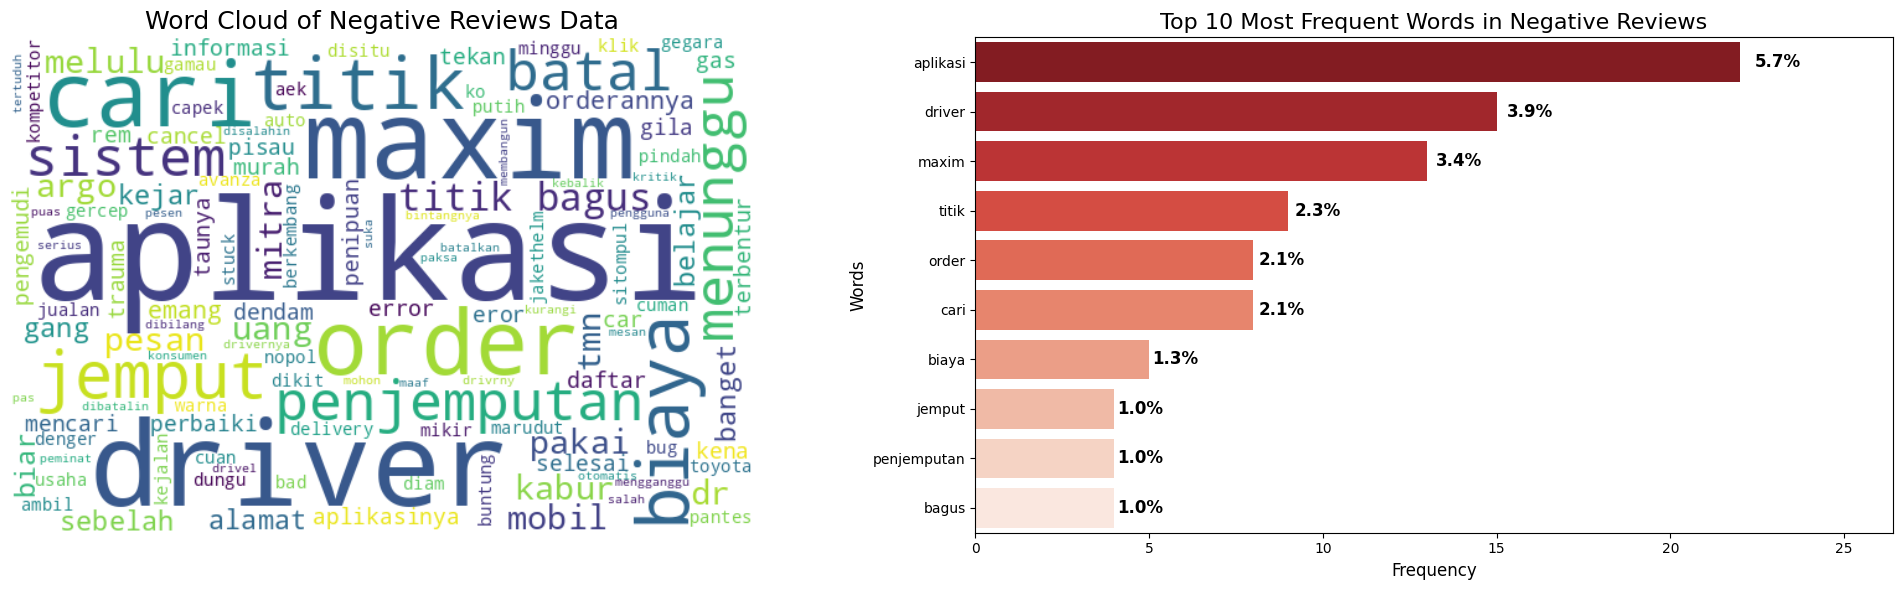

In [21]:
# Plotting Word Cloud of Negative Reviews Data

# Collect all the words from the cleaned negative text.
list_words = ' '.join(word for tweet in negative_tweets['text_stopword'] for word in tweet)

# Create a WordCloud object.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Calculate the frequency of words.
word_counts = Counter(list_words.split())

# Pick up the 10 most popular words in negative tweets.
top_words = word_counts.most_common(10)

# Separate words and their frequency.
words, counts = zip(*top_words)

# Calculates the percentage of word occurrences.
total_words = sum(word_counts.values())
percentages = [(count / total_words) * 100 for count in counts]

# Create a figure with two subplots (WordCloud and Bar Chart).
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Word Cloud ---
axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].set_title('Word Cloud of Negative Reviews Data', fontsize=18)
axes[0].axis('off')

# --- Bar Chart ---
sns.barplot(x=list(counts), y=list(words), ax=axes[1], palette='Reds_r')

# Add text with a slight offset to the right.
for i, (count, perc) in enumerate(zip(counts, percentages)):
    offset_x = count * 0.02  # Offset 2% dari panjang batang
    axes[1].text(count + offset_x, i, f"{perc:.1f}%", va='center', fontsize=12, color='black', weight='bold')

# Customize the appearance of the chart bar.
axes[1].set_title('Top 10 Most Frequent Words in Negative Reviews', fontsize=16)
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('Words', fontsize=12)
axes[1].set_xlim(0, max(counts) * 1.2)  # Menambah margin di sumbu X.

# Adjust the layout to make it neat.
plt.tight_layout()
plt.show()


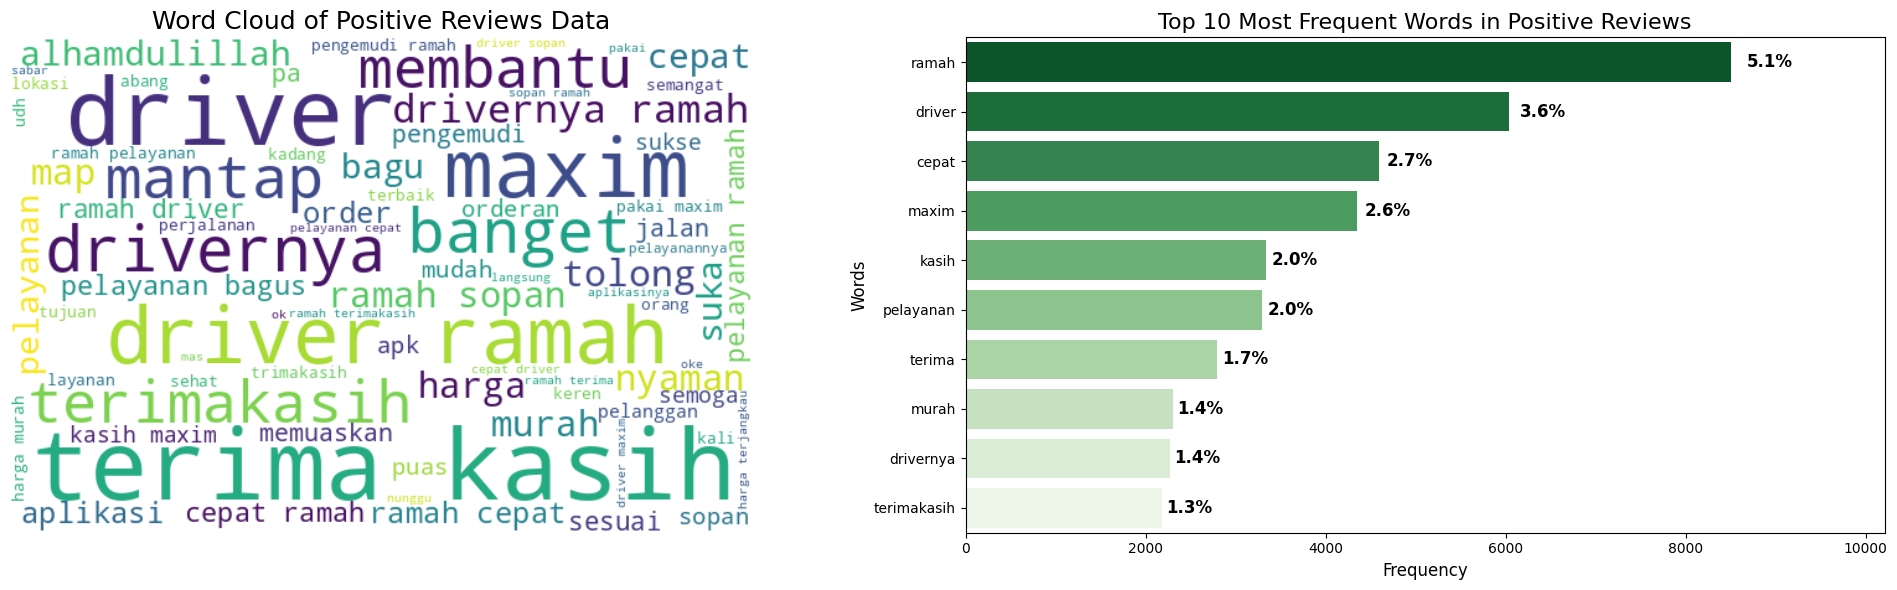

In [22]:
# Plotting Word Cloud of Positive Reviews Data

# Collect all the words from the positive text that has already been cleaned up.
list_words = ' '.join(word for tweet in positive_tweets['text_stopword'] for word in tweet)

# Create a WordCloud object.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Counting word frequency.
word_counts = Counter(list_words.split())

# Take the 10 most popular words in positive tweets.
top_words = word_counts.most_common(10)

# Separate words and their frequency.
words, counts = zip(*top_words)

# Calculates the percentage of word occurrences.
total_words = sum(word_counts.values())
percentages = [(count / total_words) * 100 for count in counts]

# Create a figure with two subplots (WordCloud and Bar Chart).
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Word Cloud ---
axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].set_title('Word Cloud of Positive Reviews Data', fontsize=18)
axes[0].axis('off')

# --- Bar Chart ---
sns.barplot(x=list(counts), y=list(words), ax=axes[1], palette='Greens_r')

# Add text with a slight offset to the right
for i, (count, perc) in enumerate(zip(counts, percentages)):
    offset_x = count * 0.02  # Offset 2% dari panjang batang
    axes[1].text(count + offset_x, i, f"{perc:.1f}%", va='center', fontsize=12, color='black', weight='bold')

# Customize the appearance of the chart bar.
axes[1].set_title('Top 10 Most Frequent Words in Positive Reviews', fontsize=16)
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('Words', fontsize=12)
axes[1].set_xlim(0, max(counts) * 1.2)  # Menambah margin di sumbu X.

# Adjust the margin layout.
plt.tight_layout()
plt.show()


### Data Splitting and Extraction Features

#### Feature extraction

In [23]:
!pip install gensim==4.3.3

In [24]:
# Feature extraction
# Divide data into training data and test data

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Separate data into features (tweets) and labels (sentiment)
X = clean_df['text_akhir']
y = clean_df['polarity']

# run Feature Extraction Method
%run -i scripts/runExtrFeature.py

extrFeat(X,y, dispFeat=True, extFeatType='tfidf')
extrFeat(X,y, dispFeat=True, extFeatType='w2vec')
extrFeat(X,y, dispFeat=True, extFeatType='bow')

features_tfidf_df:


,aa,aamiin,abal,abang,abangnya,abg,abgnya,abng,abuabu,ac,...,wkwk,wkwkwk,worth,xim,yaaa,yah,yahh,yh,yng,yuk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


features_w2v_df:


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.273746,-0.283629,-0.094487,-0.314718,0.042755,0.108343,-0.004870,0.352215,0.043874,0.201428,...,0.435842,0.008472,0.158312,-0.278154,0.070149,0.236931,-0.039569,-0.184484,0.282557,-0.129939
1,0.160762,0.376469,-0.039651,-0.214986,0.220491,-0.258752,0.275386,0.396582,-0.116053,0.035679,...,0.164572,0.142277,0.290981,-0.082410,0.636711,-0.225659,-0.036694,-0.401423,0.163780,0.013071
2,0.250681,0.192511,-0.084749,-0.258250,0.140372,-0.097803,0.206738,0.300992,0.069633,0.084189,...,0.253722,0.131148,0.174703,-0.207308,0.418615,-0.097286,-0.165537,-0.328083,0.327115,0.100711
3,0.117875,0.194143,-0.061766,-0.314332,-0.008362,-0.175984,0.207496,0.238835,-0.048893,0.020984,...,0.362648,0.199501,0.085670,-0.134689,0.470837,0.098844,-0.223476,-0.144080,0.475997,0.050501
4,0.319551,-0.189654,-0.198220,-0.139766,-0.126882,0.146803,-0.046117,0.634157,-0.236519,0.234401,...,0.597089,0.040546,0.196944,-0.198576,0.208349,0.051396,0.293135,-0.388154,0.050153,-0.395266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39475,-0.215435,0.396884,0.074722,0.059478,0.186305,-0.314964,0.199671,1.019331,-0.405293,-0.101797,...,0.601856,0.265727,0.249672,-0.053136,0.795816,0.231897,0.361308,-0.657595,0.142471,-0.372693
39476,-0.313314,0.637868,0.298675,0.143475,0.281160,-0.362986,0.269502,1.001746,-0.380144,-0.011900,...,0.513457,0.445486,0.144044,0.126797,0.870696,0.334012,0.069916,-0.834131,0.401382,-0.246704
39477,-0.214169,0.706634,0.453999,-0.050474,0.853940,-0.480202,0.606731,0.898918,-0.381922,0.031615,...,0.311115,0.396870,0.277577,0.239883,1.238397,0.307403,0.218561,-0.906694,0.366539,-0.025182
39478,0.118726,-0.204598,-0.422750,-0.225286,-0.337435,-0.026485,-0.333457,0.236032,0.086429,0.261185,...,0.448608,0.024427,0.453818,-0.244349,0.237476,-0.088460,-0.109095,0.116218,0.397957,-0.132732


features_bow_df:


,aa,aamiin,abang,abangnya,abg,abng,abuabu,ac,adain,adakan,...,warna,warung,watching,wifi,wilayah,wktu,wkwk,worth,yaaa,yah
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

### Modeling

In [25]:
# import module

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform

# run - support methods models
%run -i scripts/runMethodbox.py


#### Naive Bayes (NB)

In [26]:
## Naive Bayes (NB)
%run -i scripts/runMethModNaiveBayes.py

In [27]:
## run Learning Model - Naive Bayes
%run -i scripts/runModLernNaiveBayes.py NB11 NB12 NB13 NB14 NB21 NB22

,ModelName,IdRun,DateAction,options,Params,Remarks,AccuracyTrain,AccuracyTest,PrecisionTest,RecallTest,F1ScoreTest
0,Naive Bayes,NB11,2025-04-04 13:51:28,"{'ModelType': 'multinomial', 'extFitType': 'tfidf', 'scheme': '80/20'}",{'modelParams': {'alpha': 0.5}},NaN,0.864393,0.849164,0.850750,0.849164,0.849884
1,Naive Bayes,NB12,2025-04-04 13:51:31,"{'ModelType': 'bernoulli', 'extFitType': 'tfidf', 'scheme': '80/20'}",{'modelParams': {'alpha': 0.5}},NaN,0.840077,0.831940,0.834614,0.831940,0.833121
2,Naive Bayes,NB13,2025-04-04 13:51:33,"{'ModelType': 'multinomial', 'extFitType': 'tfidf', 'scheme': '70/30'}",{'modelParams': {'alpha': 0.5}},NaN,0.866949,0.847687,0.848805,0.847687,0.848208
3,Naive Bayes,NB14,2025-04-04 13:51:36,"{'ModelType': 'bernoulli', 'extFitType': 'tfidf', 'scheme': '70/30'}",{'modelParams': {'alpha': 0.5}},NaN,0.841909,0.830294,0.832819,0.830294,0.831417
4,Naive Bayes,NB21,2025-04-04 13:51:51,"{'gridSCV': True, 'ModelType': 'multinomial', 'extFitType': 'tfidf', 'scheme': '70/30'}",{'BestParamsGridSCV': {'alpha': 1.0}},NaN,0.866949,0.848193,0.848484,0.848193,0.848336
5,Naive Bayes,NB22,2025-04-04 13:52:13,"{'gridSCV': True, 'ModelType': 'bernoulli', 'extFitType': 'tfidf', 'scheme': '70/30'}",{'BestParamsGridSCV': {'alpha': 0.01}},NaN,0.842814,0.831223,0.834393,0.831223,0.832594


#### Random Forest (RF)

In [28]:
# Random Forest (RF)
%run -i scripts/runMethModRandomForest.py

In [29]:
# Model run - Random Forest
%run -i scripts/runModLernRandomForest.py RF211 RF213 RF221 RF291

,ModelName,IdRun,DateAction,options,Params,Remarks,AccuracyTrain,AccuracyTest,PrecisionTest,RecallTest,F1ScoreTest
6,Random Forest,RF211,2025-04-04 13:54:10,"{'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}",{'modelParams': {'n_jobs': 2}},NaN,0.998955,0.903749,0.904811,0.903749,0.904202
7,Random Forest,RF213,2025-04-04 13:55:02,"{'extFitType': 'w2vec', 'scheme': '80/20', 'smote': False}",{'modelParams': {'n_jobs': 2}},NaN,0.999557,0.851317,0.849628,0.851317,0.850350
8,Random Forest,RF221,2025-04-04 13:56:28,"{'extFitType': 'tfidf', 'scheme': '70/30', 'smote': False}",{'modelParams': {'n_jobs': 2}},NaN,0.998914,0.901891,0.903231,0.901891,0.902446
9,Random Forest,RF291,2025-04-04 14:01:34,"{'randSCV': True, 'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}","{'BestParamsRandSCV': {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}}",NaN,0.997530,0.906408,0.907328,0.906408,0.906805


#### Logistic Regression (LR)

In [30]:
# Logistic Regression (LR)
%run -i scripts/runMethModLogisticRegression.py

In [31]:
# Model run - Logistic Regression
%run -i scripts/runModLernLogisticRegression.py LR311 LR313

,ModelName,IdRun,DateAction,options,Params,Remarks,AccuracyTrain,AccuracyTest,PrecisionTest,RecallTest,F1ScoreTest
0,Logistic Regression,LR311,2025-04-04 14:01:40,"{'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.951114,0.939336,0.938826,0.939336,0.938611
1,Logistic Regression,LR313,2025-04-04 14:01:51,"{'extFitType': 'w2vec', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.839286,0.833207,0.827835,0.833207,0.828900


In [39]:
%run -i scripts/runModLernLogisticRegression.py LR391

,ModelName,IdRun,DateAction,options,Params,Remarks,AccuracyTrain,AccuracyTest,PrecisionTest,RecallTest,F1ScoreTest
8,Logistic Regression,LR311,2025-04-04 14:01:40,"{'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.951114,0.939336,0.938826,0.939336,0.938611
9,Logistic Regression,LR313,2025-04-04 14:01:51,"{'extFitType': 'w2vec', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.839286,0.833207,0.827835,0.833207,0.828900
10,Logistic Regression,LR391,2025-04-04 14:28:21,"{'randSCV': True, 'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}","{'BestParamsRandSCV': {'C': 1.5702970884055387, 'penalty': 'l1', 'solver': 'liblinear'}}",NaN,0.970491,0.959980,0.959760,0.959980,0.959786


#### Decision Tree Classifier

In [32]:
# Decision Tree (DT)
%run -i scripts/runMethModDecisionTree.py


In [33]:
# Model run - Decision Tree Classifier
%run -i scripts/runModLernDecisionTree.py DT411 DT413 DT491 DT492

,ModelName,IdRun,DateAction,options,Params,Remarks,AccuracyTrain,AccuracyTest,PrecisionTest,RecallTest,F1ScoreTest
0,DecisionTree Classifier,DT411,2025-04-04 14:03:17,"{'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.998955,0.877660,0.877836,0.877660,0.877746
1,DecisionTree Classifier,DT413,2025-04-04 14:03:38,"{'extFitType': 'w2vec', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.999557,0.795466,0.795495,0.795466,0.795481
2,DecisionTree Classifier,DT491,2025-04-04 14:06:43,"{'randSCV': True, 'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}","{'BestParamsRandSCV': {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 8, 'min_samples_split': 8}}",NaN,0.870314,0.855876,0.851946,0.855876,0.849991
3,DecisionTree Classifier,DT492,2025-04-04 14:09:14,"{'randSCV': True, 'extFitType': 'tfidf', 'scheme': '70/30', 'smote': False}","{'BestParamsRandSCV': {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 7, 'min_samples_split': 12}}",NaN,0.872123,0.852330,0.848365,0.852330,0.845664


#### Gradient Boosting

In [34]:
# Gradient Boosting
%run -i scripts/runMethModGradientBoosting.py

In [35]:
# Model run - Gradient Boosting
%run -i scripts/runModLernrGradientBoosting.py GB511 GB513

,ModelName,IdRun,DateAction,options,Params,Remarks,AccuracyTrain,AccuracyTest,PrecisionTest,RecallTest,F1ScoreTest
4,Gradient Boosting,GB511,2025-04-04 14:14:19,"{'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.866103,0.856256,0.855019,0.856256,0.847234
5,Gradient Boosting,GB513,2025-04-04 14:17:31,"{'extFitType': 'w2vec', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.853343,0.840172,0.840081,0.840172,0.840127


#### Adaboost Classifier

In [36]:
# Adaboost Classifier
%run -i scripts/runMethModAdaboostClassifier.py

In [37]:
# Model run Adaboost Classifier
%run -i scripts/runModLernAdaboostClassifier.py AD611 AD613

,ModelName,IdRun,DateAction,options,Params,Remarks,AccuracyTrain,AccuracyTest,PrecisionTest,RecallTest,F1ScoreTest
0,Adaboost Classifier,AD611,2025-04-04 14:18:49,"{'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.804110,0.797239,0.797215,0.797239,0.767905
1,Adaboost Classifier,AD613,2025-04-04 14:19:36,"{'extFitType': 'w2vec', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.816964,0.812690,0.811276,0.812690,0.811939


### List result model

In [49]:
resultRunModel_df.index = resultRunModel_df.index + 1
resultRunModel_df

,ModelName,IdRun,DateAction,options,Params,Remarks,AccuracyTrain,AccuracyTest,PrecisionTest,RecallTest,F1ScoreTest
1,Adaboost Classifier,AD611,2025-04-04 14:18:49,"{'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.804110,0.797239,0.797215,0.797239,0.767905
2,Adaboost Classifier,AD613,2025-04-04 14:19:36,"{'extFitType': 'w2vec', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.816964,0.812690,0.811276,0.812690,0.811939
3,DecisionTree Classifier,DT411,2025-04-04 14:03:17,"{'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.998955,0.877660,0.877836,0.877660,0.877746
4,DecisionTree Classifier,DT413,2025-04-04 14:03:38,"{'extFitType': 'w2vec', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.999557,0.795466,0.795495,0.795466,0.795481
5,DecisionTree Classifier,DT491,2025-04-04 14:06:43,"{'randSCV': True, 'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}","{'BestParamsRandSCV': {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 8, 'min_samples_split': 8}}",NaN,0.870314,0.855876,0.851946,0.855876,0.849991
6,DecisionTree Classifier,DT492,2025-04-04 14:09:14,"{'randSCV': True, 'extFitType': 'tfidf', 'scheme': '70/30', 'smote': False}","{'BestParamsRandSCV': {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 7, 'min_samples_split': 12}}",NaN,0.872123,0.852330,0.848365,0.852330,0.845664
7,Gradient Boosting,GB511,2025-04-04 14:14:19,"{'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.866103,0.856256,0.855019,0.856256,0.847234
8,Gradient Boosting,GB513,2025-04-04 14:17:31,"{'extFitType': 'w2vec', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.853343,0.840172,0.840081,0.840172,0.840127
9,Logistic Regression,LR311,2025-04-04 14:01:40,"{'extFitType': 'tfidf', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.951114,0.939336,0.938826,0.939336,0.938611
10,Logistic Regression,LR313,2025-04-04 14:01:51,"{'extFitType': 'w2vec', 'scheme': '80/20', 'smote': False}",{'modelParams': {'random_state': 42}},NaN,0.839286,0.833207,0.827835,0.833207,0.828900


### Chart for result of Run Models

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

resultRunModelCart_df = resultRunModel_df.copy()
resultRunModelCart_df.insert(0, 'No', resultRunModelCart_df.index)

# Create a merge column for the unique identification of each run
resultRunModelCart_df['ModelRun'] = resultRunModelCart_df['ModelName'] + ' (' + resultRunModelCart_df['IdRun'] + ')'

#### Model Performance Comparisons

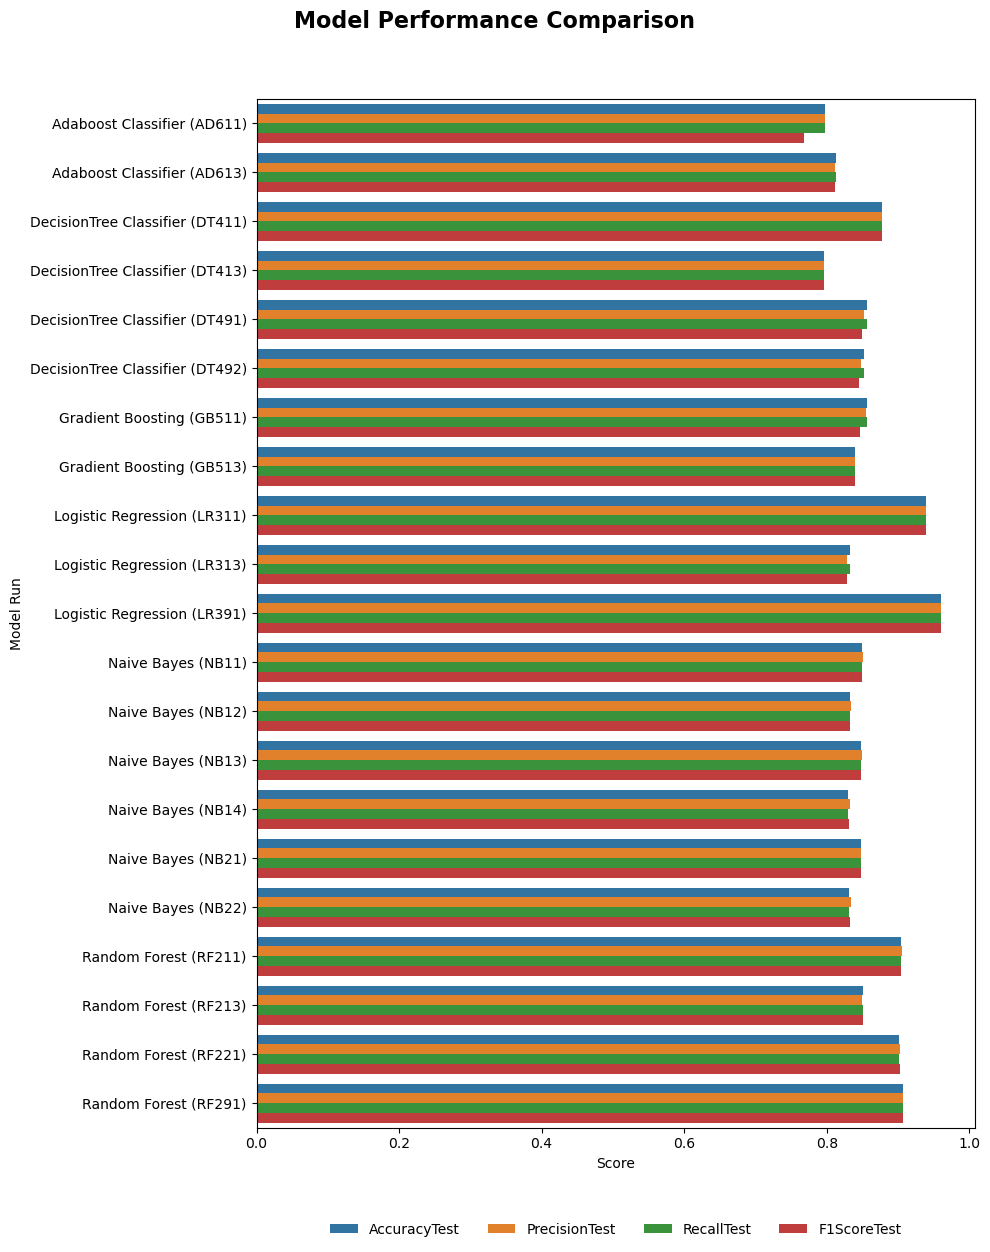

In [112]:
### Chart for Model Performance Comparisons

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 12))

metrics = ['AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1ScoreTest']
melted = resultRunModelCart_df.melt(
    id_vars=['No', 'ModelRun'],
    value_vars=metrics,
    var_name='Metric',
    value_name='Score'
)

sns.barplot(data=melted, y='ModelRun', x='Score', hue='Metric')
plt.yticks(rotation=0)

# Remove plt.title and replace it with plt.suptitle
plt.suptitle(
    'Model Performance Comparison',
    fontsize=16,
    y=0.98, 
    fontweight='bold'
)

plt.xlabel('Score')
plt.ylabel('Model Run')
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Legend in the bottom center
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.08),
    ncol=5,
    frameon=False
)

plt.show()


#### Average Metrics per Model Type

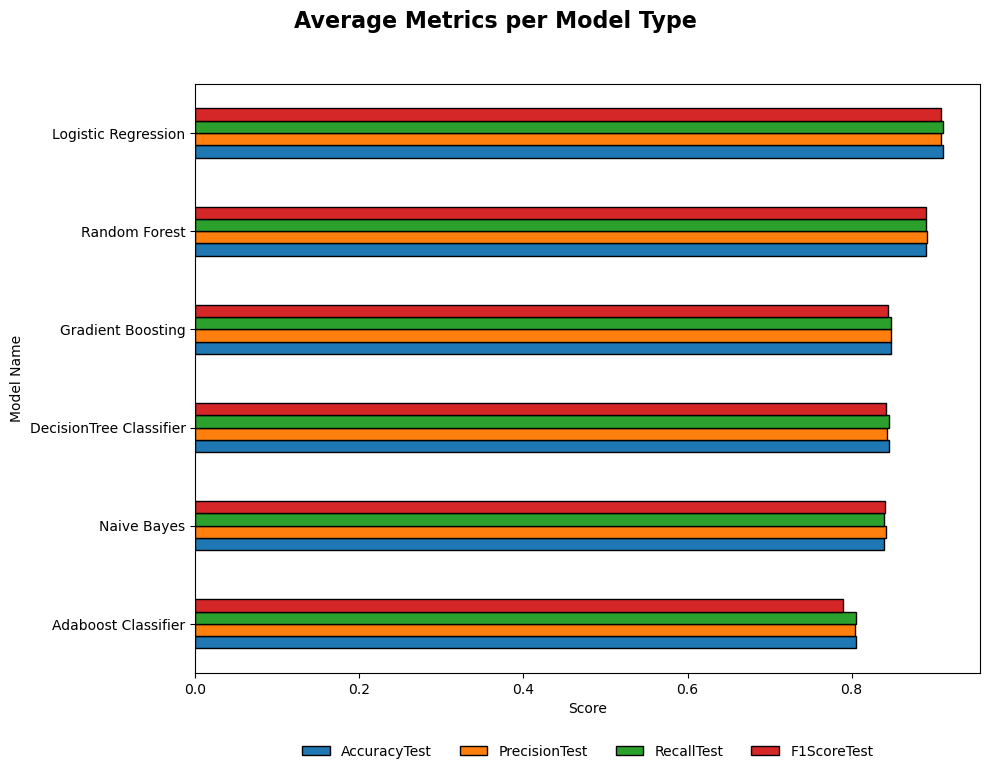

In [113]:
#### Average Metrics per Model Type

import matplotlib.pyplot as plt

# Grouping and calculating averages
avg_scores = resultRunModelCart_df.groupby('ModelName')[['AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1ScoreTest']].mean().reset_index()
avg_scores = avg_scores.sort_values(by='F1ScoreTest', ascending=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))
avg_scores.set_index('ModelName').plot(kind='barh', edgecolor='black', ax=ax)

# Use the title to fit in the middle.
plt.suptitle(
    'Average Metrics per Model Type',
    fontsize=16,
    y=0.98,
    fontweight='bold'
)

plt.xlabel('Score')
plt.ylabel('Model Name')

# Shift the plot position to fit the legend and suptitle
box = ax.get_position()
ax.set_position([box.x0, box.y0 + 0.1, box.width, box.height * 0.85])

# Legend below, middle
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=5,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Performance Trends per Run

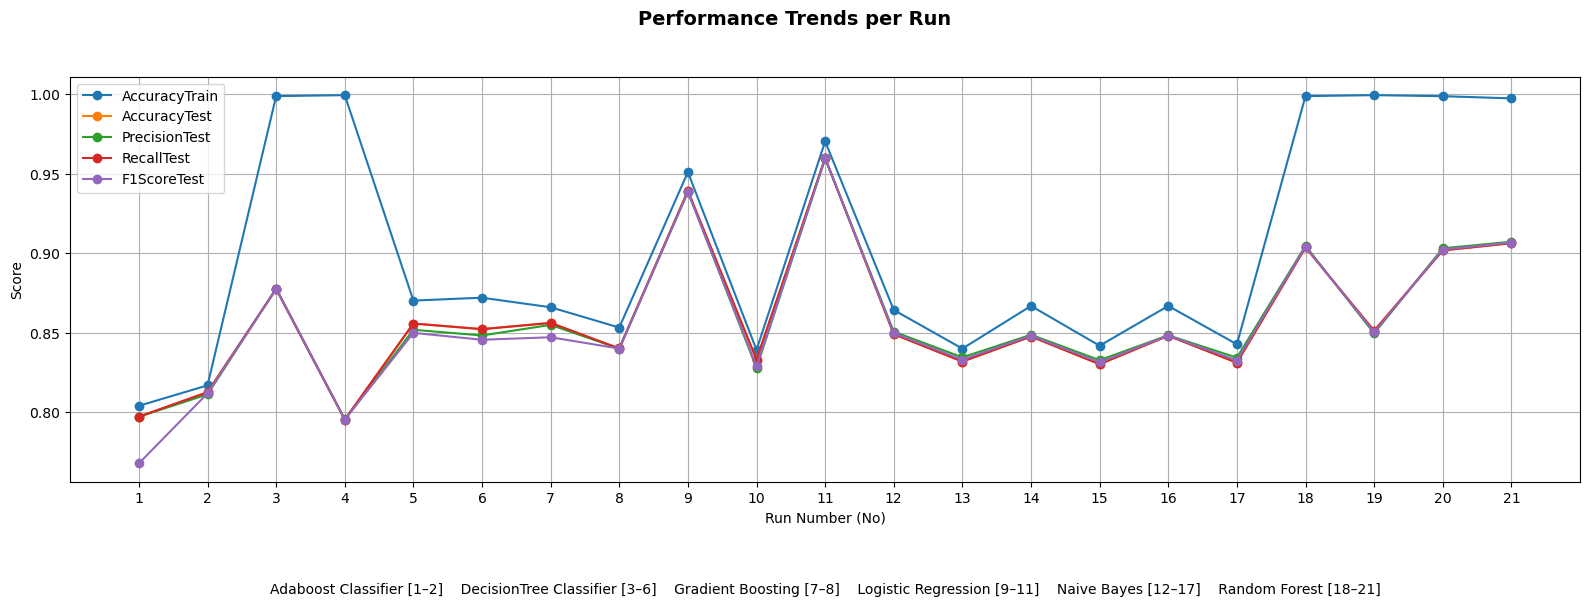

In [78]:
#### Performance Trends per Run

import matplotlib.pyplot as plt

metrics = ['AccuracyTrain','AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1ScoreTest']
df = resultRunModelCart_df.copy()

fig, ax = plt.subplots(figsize=(16, 6))

# Plot metrik per No
for metric in metrics:
    ax.plot(df['No'], df[metric], label=metric, marker='o')

# Title figure (middle)
fig.suptitle(
    'Performance Trends per Run',
    fontsize=14,
    y=0.98,
    fontweight='bold'
)

# Axis labels
ax.set_xlabel('Run Number (No)')
ax.set_ylabel('Score')
ax.legend()
ax.grid(True)
ax.set_xticks(df['No'])

# Create a label line group model
group_bounds = df.groupby('ModelName')['No'].agg(['min', 'max']).reset_index()
group_labels = [f"{row['ModelName']} [{row['min']}–{row['max']}]" for _, row in group_bounds.iterrows()]
group_line = "    ".join(group_labels)

# Add group label text below
ax.text(
    0.5, -0.25,
    group_line,
    ha='center', va='top',
    transform=ax.transAxes,
    fontsize=10
)

# Arrange the basement so that there is enough
plt.subplots_adjust(bottom=0.3)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Space for suptitles


plt.show()


#### F1 Score Distribution by Model Type

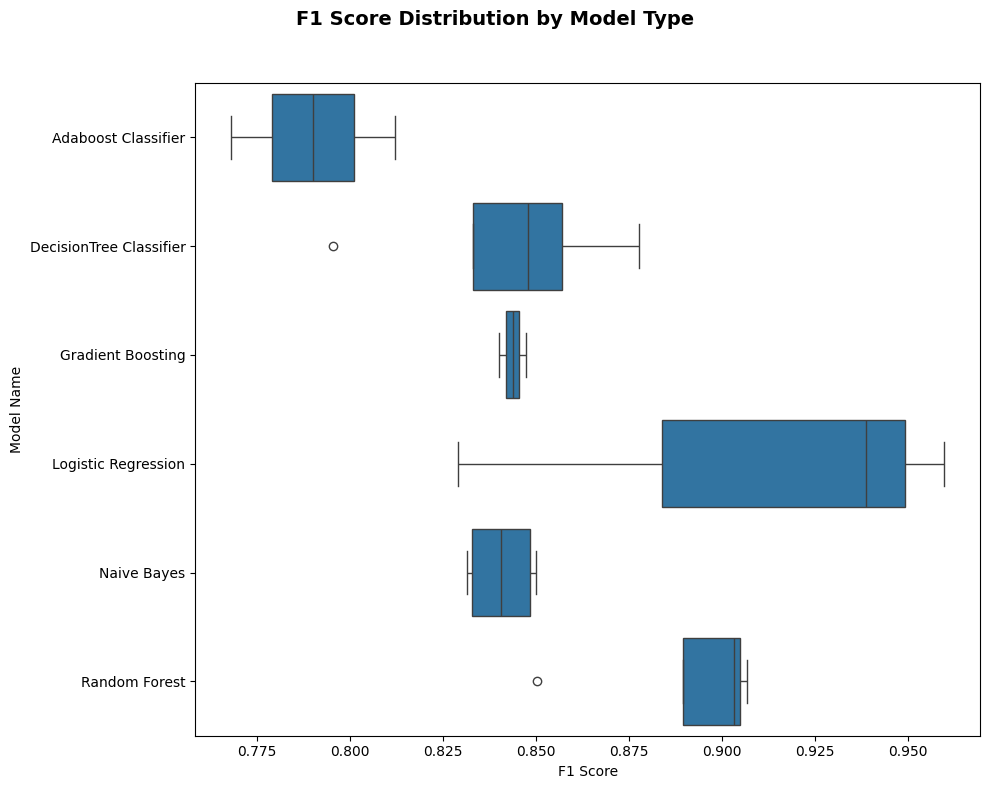

In [ ]:
#### F1 Score Distribution by Model Type

import matplotlib.pyplot as plt
import seaborn as sns

# Create figures and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Boxplot horizontal
sns.boxplot(data=resultRunModelCart_df, y='ModelName', x='F1ScoreTest', orient='h', ax=ax)

# The title in the middle of the figure, rather large
fig.suptitle('F1 Score Distribution by Model Type', fontsize=14, fontweight='bold', y=0.98)

# Axis labels
ax.set_xlabel('F1 Score')
ax.set_ylabel('Model Name')

# Layout so that it is not cut and neat
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Love for the space for titles

plt.show()


#### Top 3 Models Comparison (Radar Chart)

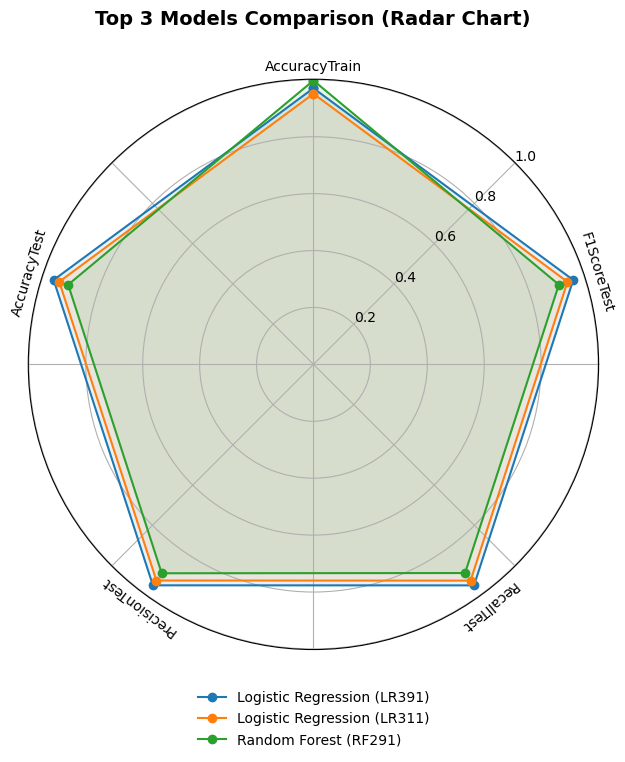

In [162]:
#### Top 3 Models Comparison (Radar Chart)

from math import pi
import numpy as np
import matplotlib.pyplot as plt

# Take the best 3 runs based on F1ScoreTest
top3 = resultRunModelCart_df.nlargest(3, 'F1ScoreTest')

# Radar chart setup
metrics = ['AccuracyTrain','AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1ScoreTest']
num_vars = len(metrics)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles = [angle + pi/2 for angle in angles]  # Rotate so first axis (AccuracyTrain) is at 12 o'clock
angles += angles[:1]  # Complete the loop

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for _, row in top3.iterrows():
    values = [row[m] for m in metrics]
    values += values[:1]

    ax.plot(angles, values, label=f"{row['ModelName']} ({row['IdRun']})", marker='o')
    ax.fill(angles, values, alpha=0.1)

# Hide the degree number on the axis
ax.set_xticklabels([])

# Manual label in the desired position
label_rotations = [0, 73, 143, 220, 287]  # Adjust the rotation of each label

for angle, label, rotation in zip(angles[:-1], metrics, label_rotations):
    ax.text(angle, max(values) * 1.05, label, ha='center', va='center', fontsize=10, rotation=rotation)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0], angle=45)

# Title in the top center with a space down
fig.suptitle('Top 3 Models Comparison (Radar Chart)', fontsize=14, fontweight='bold', y=0.95)

# Legend below center
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=1,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Top Runs Comparison (Radar Chart) per Model Name

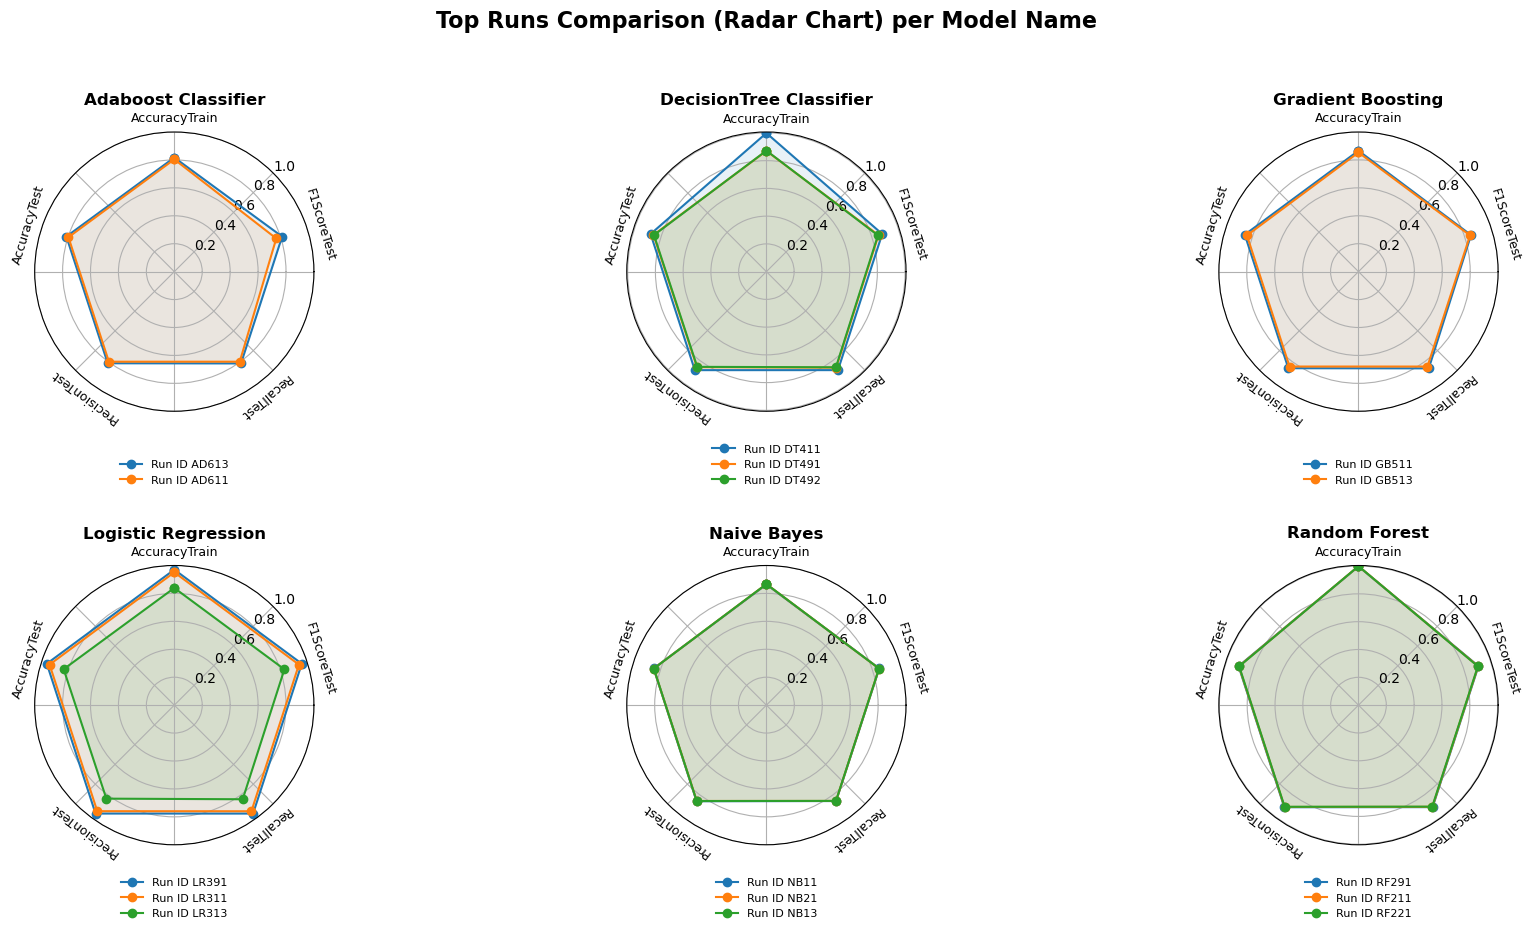

In [170]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

# Radar chart setup
metrics = ['AccuracyTrain', 'AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1ScoreTest']
num_vars = len(metrics)
base_angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles = [angle + pi/2 for angle in base_angles]
angles += angles[:1]
label_rotations = [0, 73, 143, 220, 287]

# Retrieve all groups based on ModelName
grouped = list(resultRunModelCart_df.groupby('ModelName'))

# Batch plot per 6 models (2 rows × 3 columns)
for i in range(0, len(grouped), 6):
    batch = grouped[i:i+6]
    fig, axes = plt.subplots(nrows=2, ncols=3, subplot_kw={'projection': 'polar'}, figsize=(18, 10))
    axes = axes.flatten()

    for ax_idx, (model_name, group_df) in enumerate(batch):
        ax = axes[ax_idx]
        top_runs = group_df.nlargest(3, 'F1ScoreTest')

        for _, row in top_runs.iterrows():
            values = [row[m] for m in metrics]
            values += values[:1]
            ax.plot(angles, values, label=f"Run ID {row['IdRun']}", marker='o')
            ax.fill(angles, values, alpha=0.1)

        # Clear the default label of the axis
        ax.set_xticklabels([])
        for angle, label, rotation in zip(angles[:-1], metrics, label_rotations):
            ax.text(angle, 1.1, label, ha='center', va='center', fontsize=9, rotation=rotation)

        ax.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0], angle=45)
        ax.set_title(f"{model_name}", fontsize=12, fontweight='bold', pad=20)
        ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), fontsize=8, frameon=False)

    # Turn off the rest of the subplots if the group < 6
    for j in range(len(batch), 6):
        fig.delaxes(axes[j])

    fig.suptitle('Top Runs Comparison (Radar Chart) per Model Name', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


### Preprocessing New Sentences

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit TF-IDF
tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.8)
X_train_tfidf = tfidf.fit_transform(X_train)

# Fit Model Logistic Regression
model = LogisticRegression(
    random_state=42,
    C=1.5702970884055387,
    penalty='l1',
    solver='liblinear'
)
model.fit(X_train_tfidf, y_train)

# Preprocessing New Sentences
# new_sentence = input("Masukkan kalimat baru: ")
new_sentence = "Saya suka aplikasi ini, drivernya ramah dan tarifnya terjangkau. Saya kasih bintang lima. Bagus mantap"

new_sentence_cleaned = cleaningText(new_sentence)
new_sentence_casefolded = casefoldingText(new_sentence_cleaned)
new_sentence_slangfixed = fix_slangwords(new_sentence_casefolded)
new_sentence_tokenized = tokenizingText(new_sentence_slangfixed)
new_sentence_filtered = filteringText(new_sentence_tokenized)
new_sentence_final = toSentence(new_sentence_filtered)

# Transform New Sentences with TF-IDF
X_new_sentence = tfidf.transform([new_sentence_final])

# Sentiment Prediction
sentiment_prediction = model.predict(X_new_sentence)

# Output
if sentiment_prediction[0] == 'positive':
    print(f'Kalimat: "{new_sentence}"')
    print("Sentiment: POSITIF.")
else:
    print(f'Kalimat: "{new_sentence}"')
    print("Sentiment: NEGATIF.")

Kalimat: "Saya suka aplikasi ini, drivernya ramah dan tarifnya terjangkau. Saya kasih bintang lima. Bagus mantap"
Sentiment: POSITIF.


### File requirements

In [47]:
!pip freeze > requirements.txt